In [ ]:
from google.colab import files


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
import numpy as np
import plotly.graph_objects as go

In [ ]:
!pip install xlsxwriter


In [ ]:
import pandas as pd

In [ ]:
# url = 'https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=1&dom_lg=1&player_id1=48a5a5d6&p1yrfrom=2022-2023&player_id2=b0f7e36c&p2yrfrom=2019-2020&p2yrto=2021-2022&player_id3=afdc14d7&p3yrfrom=2023-2024&player_id4=042e8a49&p4yrfrom=2019-2020&p4yrto=2021-2022&player_id5=4a1a9578&p5yrfrom=2022-2023&player_id6=20730eae&p6yrfrom=2022-2023'
url = "https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=1&dom_lg=1&player_id1=6f9fa232&p1yrfrom=2022-2023&player_id2=3bd65247&p2yrfrom=2022-2023&player_id3=bed68338&p3yrfrom=2022-2023&player_id4=dcfb17f4&p4yrfrom=2022-2023&player_id5=b8bd60fe&p5yrfrom=2022-2023&player_id6=3ec9f005&p6yrfrom=2022-2023"

In [ ]:
df_standards = pd.read_html(url, attrs={"id":"standard_stats"})[0]

In [ ]:
df_shooting = pd.read_html(url, attrs={"id":"shooting_stats"})[0]

In [ ]:
df_passing = pd.read_html(url, attrs={"id":"passing_stats"})[0]

In [ ]:
df_gca_stats = pd.read_html(url , attrs={"id":"gca_stats"})[0]

In [ ]:
df_possession_stats = pd.read_html(url , attrs={"id":"possession_stats"})[0]

In [ ]:
df_defense_stats = pd.read_html(url , attrs={"id":"defense_stats"})[0]

In [ ]:
import pandas as pd

def process_dataframe(df):
    # Check if columns have multiple levels
    if isinstance(df.columns, pd.MultiIndex):
        # Drop the first level of the MultiIndex
        df_fixed_columns = df.columns.droplevel(0)
        # Assign the new columns to the DataFrame
        df_fixed = df.copy()
        df_fixed.columns = df_fixed_columns
    else:
        # If no MultiIndex, return the DataFrame as is
        df_fixed = df

    # Remove duplicate columns but keep the first occurrence
    df_fixed = df_fixed.loc[:, ~df_fixed.columns.duplicated(keep='first')]

    return df_fixed

# Example DataFrames
# Replace these with your actual DataFrames
df_standards_fixed = process_dataframe(df_standards)
df_shooting_fixed = process_dataframe(df_shooting)
df_passing_fixed = process_dataframe(df_passing)
df_gca_stats_fixed = process_dataframe(df_gca_stats)
df_possession_stats_fixed = process_dataframe(df_possession_stats)
df_defense_stats_fixed = process_dataframe(df_defense_stats)


##Print Data


In [ ]:
print(df_standards_fixed)
print(df_shooting_fixed)
print(df_defense_stats_fixed)
print(df_gca_stats_fixed)
print(df_passing_fixed)
print(df_possession_stats_fixed)


               Player             Span  Nation    Pos       Squad  MP  Starts  \
0      Osame Sahraoui  from 2022-23 on  no NOR  FW,MF    2 squads  49      42   
1  Eliesse Ben Seghir  from 2022-23 on  ma MAR  FW,MF      Monaco  34      19   
2     Abde Ezzalzouli  from 2022-23 on  ma MAR  FW,MF    3 squads  58      25   
3          Amine Adli  from 2022-23 on  ma MAR  FW,MF  Leverkusen  50      24   
4      Ilias Akhomach  from 2022-23 on  ma MAR  MF,FW    2 squads  35      20   
5      Ismael Saibari  from 2022-23 on  ma MAR     MF    2 squads  41      20   

    Min   90s  Gls  ...  CrdR   xG  npxG  xAG  npxG+xAG  PrgC  PrgP  PrgR  \
0  3762  41.8    9  ...     0  8.9   8.9  7.7      16.6   245   177   444   
1  1636  18.2    7  ...     1  3.1   3.1  1.9       5.0    66    89   160   
2  2497  27.7    5  ...     2  6.1   5.3  2.3       7.6   162    74   243   
3  2342  26.0    9  ...     2  8.4   8.4  4.0      12.4    79    90   271   
4  1759  19.5    2  ...     0  3.4   3.4  2.8  

###Merge

In [ ]:
import pandas as pd

def process_dataframe(df):
    # Check if columns have multiple levels
    if isinstance(df.columns, pd.MultiIndex):
        # Drop the first level of the MultiIndex
        df_fixed_columns = df.columns.droplevel(0)
        # Assign the new columns to the DataFrame
        df_fixed = df.copy()
        df_fixed.columns = df_fixed_columns
    else:
        # If no MultiIndex, return the DataFrame as is
        df_fixed = df

    # Remove duplicate columns but keep the first occurrence
    df_fixed = df_fixed.loc[:, ~df_fixed.columns.duplicated(keep='first')]

    return df_fixed

# Process each DataFrame
df_standards_fixed = process_dataframe(df_standards)
df_shooting_fixed = process_dataframe(df_shooting)
df_passing_fixed = process_dataframe(df_passing)
df_gca_stats_fixed = process_dataframe(df_gca_stats)
df_possession_stats_fixed = process_dataframe(df_possession_stats)
df_defense_stats_fixed = process_dataframe(df_defense_stats)

# List of DataFrames
dfs = [df_standards_fixed, df_shooting_fixed, df_passing_fixed, df_gca_stats_fixed, df_possession_stats_fixed, df_defense_stats_fixed]

# Combine all DataFrames based on the 'player' column
df_data = pd.concat(dfs, axis=1, join='outer')

# Ensure no duplicate columns remain
df_data = df_data.loc[:, ~df_data.columns.duplicated(keep='first')]

# Display the resulting DataFrame
print(df_data)


               Player             Span  Nation    Pos       Squad  MP  Starts  \
0      Osame Sahraoui  from 2022-23 on  no NOR  FW,MF    2 squads  49      42   
1  Eliesse Ben Seghir  from 2022-23 on  ma MAR  FW,MF      Monaco  34      19   
2     Abde Ezzalzouli  from 2022-23 on  ma MAR  FW,MF    3 squads  58      25   
3          Amine Adli  from 2022-23 on  ma MAR  FW,MF  Leverkusen  50      24   
4      Ilias Akhomach  from 2022-23 on  ma MAR  MF,FW    2 squads  35      20   
5      Ismael Saibari  from 2022-23 on  ma MAR     MF    2 squads  41      20   

    Min   90s  Gls  ...  Tkl  TklW  Tkl%  Lost  Blocks  Pass  Int  Tkl+Int  \
0  3762  41.8    9  ...   30    19  33.3    24      15    15   17       47   
1  1636  18.2    7  ...   33    22  43.5    13      28    27    6       39   
2  2497  27.7    5  ...   50    36  44.7    21      31    31   10       60   
3  2342  26.0    9  ...   35    17  35.3    22      38    34   12       47   
4  1759  19.5    2  ...   40    23  48.1  

###Write Data in Excel File

In [ ]:
with pd.ExcelWriter('PlayersData.xlsx', engine='xlsxwriter') as writer:
    df_data.to_excel(writer, sheet_name='Sheet1')
files.download('PlayersData.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with pd.ExcelWriter('output.xlsx', engine='xlsxwriter') as writer:
    df_standards_fixed.to_excel(writer, sheet_name='Sheet1')
    df_shooting_fixed.to_excel(writer, sheet_name='Sheet2')
    df_passing_fixed.to_excel(writer, sheet_name='Sheet3')
    df_gca_stats_fixed.to_excel(writer, sheet_name='Sheet4')
    df_possession_stats_fixed.to_excel(writer, sheet_name='Sheet5')
    df_defense_stats_fixed.to_excel(writer, sheet_name='Sheet6')

In [ ]:
#files.download('output.xlsx')

In [ ]:
df_standards_fixed

,Player,Span,Nation,Pos,Squad,MP,Starts,Min,90s,Gls,...,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A-PK,xG+xAG
0,Osame Sahraoui,from 2022-23 on,no NOR,"FW,MF",2 squads,49,42,3762,41.8,9,...,0,8.9,8.9,7.7,16.6,245,177,444,0.43,0.40
1,Eliesse Ben Seghir,from 2022-23 on,ma MAR,"FW,MF",Monaco,34,19,1636,18.2,7,...,1,3.1,3.1,1.9,5.0,66,89,160,0.50,0.28
2,Abde Ezzalzouli,from 2022-23 on,ma MAR,"FW,MF",3 squads,58,25,2497,27.7,5,...,2,6.1,5.3,2.3,7.6,162,74,243,0.25,0.30
3,Amine Adli,from 2022-23 on,ma MAR,"FW,MF",Leverkusen,50,24,2342,26.0,9,...,2,8.4,8.4,4.0,12.4,79,90,271,0.69,0.48
4,Ilias Akhomach,from 2022-23 on,ma MAR,"MF,FW",2 squads,35,20,1759,19.5,2,...,0,3.4,3.4,2.8,6.2,76,51,188,0.20,0.32
5,Ismael Saibari,from 2022-23 on,ma MAR,MF,2 squads,41,20,1857,20.6,6,...,0,7.7,7.7,4.1,11.8,70,92,129,0.68,0.74


### **Scatter Plot**
Plot Gls vs. Ast to see if there is any correlation between goals and assists.

<Axes: xlabel='Gls', ylabel='Ast'>

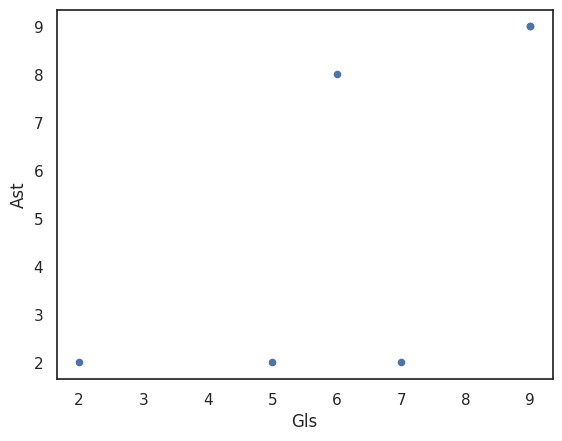

In [ ]:
sns.set(style="white", color_codes=True)
df_standards_fixed.plot(kind="scatter", x="Gls", y="Ast")


### Bar chart
Plot total Gls and Ast for each player.

[9.0, 9.0, 8.9, 8.9, 7.7, 16.6, 9.0]
[7.0, 2.0, 3.1, 3.1, 1.9, 5.0, 7.0]
[5.0, 2.0, 6.1, 5.3, 2.3, 7.6, 5.0]
[9.0, 9.0, 8.4, 8.4, 4.0, 12.4, 9.0]
[2.0, 2.0, 3.4, 3.4, 2.8, 6.2, 2.0]
[6.0, 8.0, 7.7, 7.7, 4.1, 11.8, 6.0]


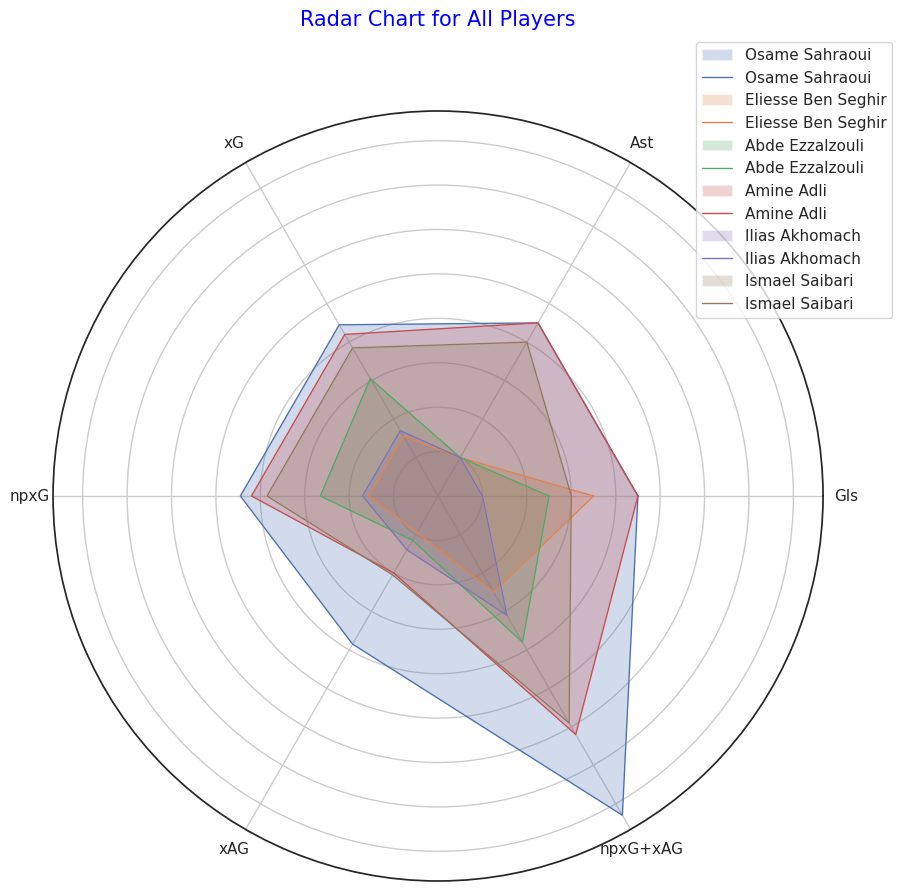

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def radar_chart_all_players(df):
    # Filter out columns with possible duplicates
    columns_of_interest = ['Gls', 'Ast', 'xG', 'npxG', 'xAG', 'npxG+xAG' ]

    # Create a custom DataFrame with only the specific columns
    filtered_columns = {col: df.filter(like=col).mean(axis=1) for col in columns_of_interest if col in df.columns}
    custom_df = df[columns_of_interest].copy()

    # Drop columns that were not present in the DataFrame
    custom_df = custom_df.dropna(axis=1, how='all')

    # If no relevant data, raise an exception
    if custom_df.empty:
        raise ValueError(f"None of the columns {columns_of_interest} are present in the DataFrame.")

    # Ensure no duplicates in custom_df
    custom_df = custom_df.loc[:,~custom_df.columns.duplicated()]

    # Set up the radar chart
    num_vars = len(custom_df.columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for index, row in custom_df.iterrows():
        player_name = df.loc[index, 'Player']
        values = row.tolist()
        values += values[:1]  # Complete the loop
        print(values)

        ax.fill(angles, values, alpha=0.25, label=player_name)
        ax.plot(angles, values, linewidth=1, label=player_name)

    ax.set_yticklabels([])  # Hide y labels
    ax.set_xticks(angles[:-1])  # Set the labels for each axis
    ax.set_xticklabels(custom_df.columns)

    plt.title('Radar Chart for All Players', size=15, color='blue', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.savefig('fig1.png')
    plt.show()


# Example usage
radar_chart_all_players(df_standards_fixed)


###Goals + Assist

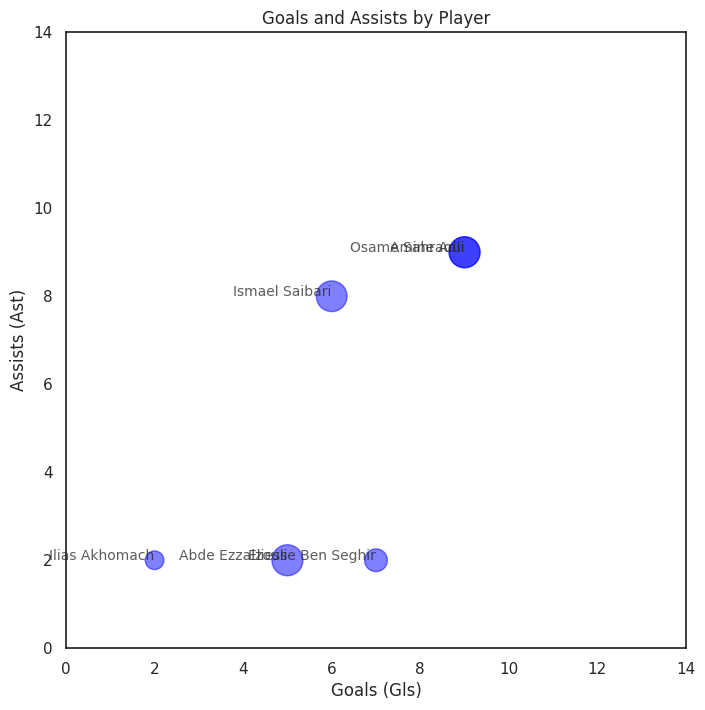

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the 'Player' column is present in your DataFrame
if 'Player' not in df_standards_fixed.columns:
    raise ValueError("The DataFrame must contain a 'Player' column.")

# Extract data
x = df_standards_fixed['Gls']
y = df_standards_fixed['Ast']
player_names = df_standards_fixed['Player']

# Generate larger sizes for the points
sizes = np.random.uniform(100, 500, len(df_standards_fixed))  # Increased size range
colors = np.random.uniform(0, 100, len(df_standards_fixed))  # Keep colors but not used

# Increase figure size
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust size as needed

# Plot
scatter = ax.scatter(x, y, s=sizes, c='blue', alpha=0.5)

# Remove the colorbar since it's not needed
# cbar = plt.colorbar(scatter)
# cbar.set_label('Color Scale')

# Annotate each point with the player's name
for i, player in enumerate(player_names):
    ax.annotate(player, (x.iloc[i], y.iloc[i]), fontsize=10, ha='right', alpha=0.75)

# Set axis limits and labels
ax.set_xlim(0, df_standards_fixed['Gls'].max() + 5)
ax.set_ylim(0, df_standards_fixed['Ast'].max() + 5)
ax.set_xlabel('Goals (Gls)')
ax.set_ylabel('Assists (Ast)')
ax.set_title('Goals and Assists by Player')

plt.show()


##Possesion

In [ ]:
df_possession_stats_fixed

,Player,Span,Nation,Pos,Squad,90s,Touches,Def Pen,Def 3rd,Mid 3rd,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,Osame Sahraoui,from 2022-23 on,no NOR,"FW,MF",2 squads,41.8,2259,16,195,883,...,1621,12840,6593,245,160,120,143,109,1845,444
1,Eliesse Ben Seghir,from 2022-23 on,ma MAR,"FW,MF",Monaco,18.2,981,5,74,459,...,778,5116,2284,66,60,19,53,31,761,160
2,Abde Ezzalzouli,from 2022-23 on,ma MAR,"FW,MF",3 squads,27.7,1427,11,137,508,...,921,7915,4358,162,98,85,98,72,1054,243
3,Amine Adli,from 2022-23 on,ma MAR,"FW,MF",Leverkusen,26.0,1374,16,126,629,...,810,4417,2417,79,55,32,70,28,1066,271
4,Ilias Akhomach,from 2022-23 on,ma MAR,"MF,FW",2 squads,19.5,870,13,103,321,...,584,4217,2397,76,54,31,59,42,650,188
5,Ismael Saibari,from 2022-23 on,ma MAR,MF,2 squads,20.6,985,22,156,427,...,575,3787,2064,70,38,27,56,23,685,129


###Carries / Distance Carried  

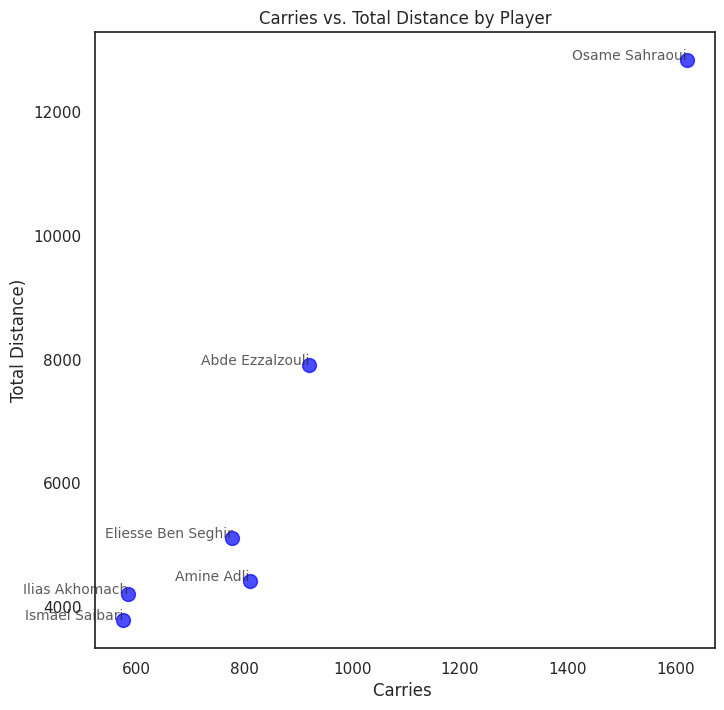

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df_possession_stats_fixed['Carries'], df_possession_stats_fixed['TotDist'], s=100, c='blue', alpha=0.7)

for i, player in enumerate(df_possession_stats_fixed['Player']):
    ax.annotate(player, (df_possession_stats_fixed['Carries'].iloc[i], df_possession_stats_fixed['TotDist'].iloc[i]), fontsize=10, ha='right', alpha=0.75)

ax.set_xlabel('Carries ')
ax.set_ylabel('Total Distance)')
ax.set_title('Carries vs. Total Distance by Player')
plt.show()


###Bar Chart of Carries for Each Player


<ipython-input-60-bef64501be4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Carries', data=df_possession_stats_fixed, palette='viridis', ax=ax)
<ipython-input-60-bef64501be4b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


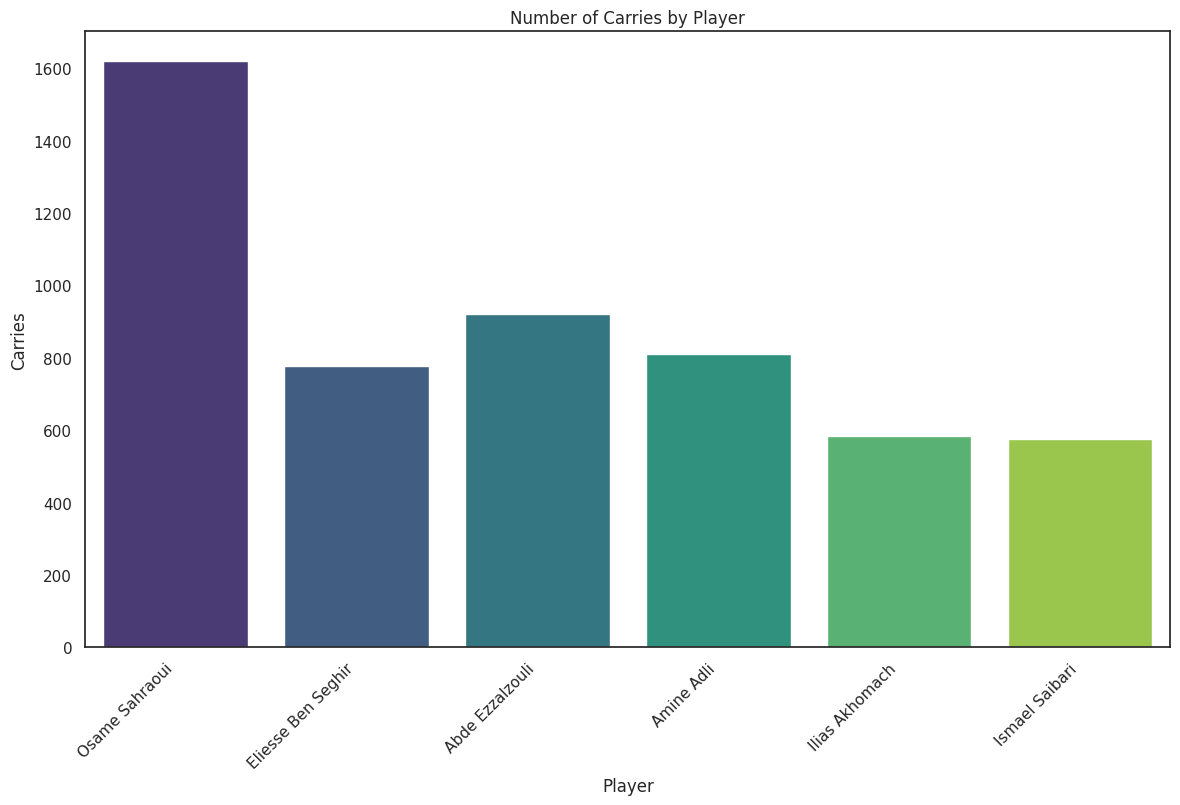

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='Player', y='Carries', data=df_possession_stats_fixed, palette='viridis', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Player')
ax.set_ylabel('Carries')
ax.set_title('Number of Carries by Player')
plt.show()


### 1. PrgC vs. Total Distance
This chart plots the number of progressive carries (PrgC) against the total carrying distance (TotDist). Each point represents a player, showing how their progressive carrying actions correlate with the total distance they moved the ball.



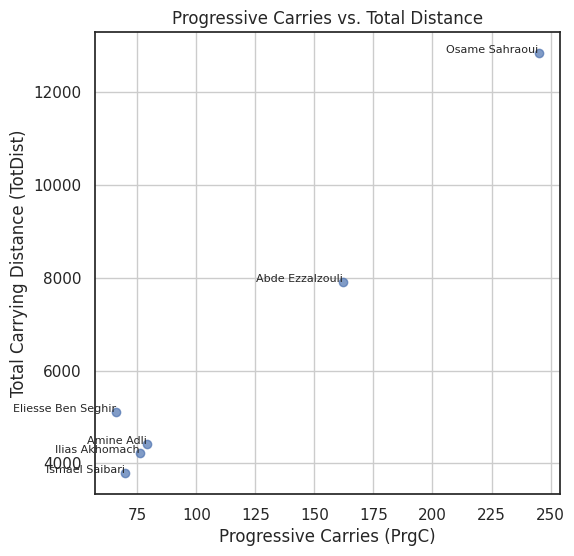

In [ ]:
import matplotlib.pyplot as plt

# Plot PrgC vs. Total Distance
plt.figure(figsize=(6, 6))
plt.scatter(df_possession_stats_fixed['PrgC'], df_possession_stats_fixed['TotDist'], alpha=0.7)
plt.title('Progressive Carries vs. Total Distance')
plt.xlabel('Progressive Carries (PrgC)')
plt.ylabel('Total Carrying Distance (TotDist)')
for i, player in df_possession_stats_fixed.iterrows():
    plt.annotate(player['Player'], (player['PrgC'], player['TotDist']), fontsize=8, ha='right')
plt.grid(True)
plt.show()


###2. Rec vs. PrgR
This chart plots the number of passes received (Rec) against the number of progressive passes received (PrgR). Each point represents a player, showing their ability to receive passes and the progression of those passes.



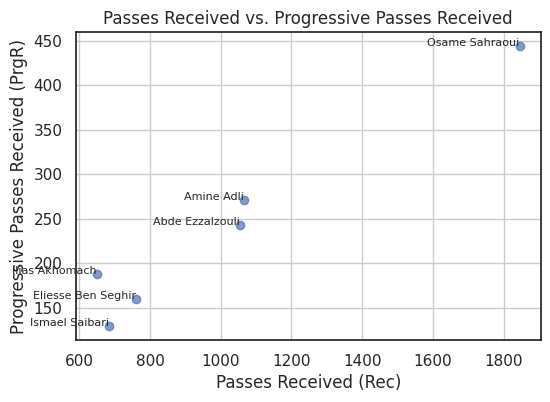

In [ ]:
import matplotlib.pyplot as plt

# Plot Rec vs. PrgR
plt.figure(figsize=(6, 4))
plt.scatter(df_possession_stats_fixed['Rec'], df_possession_stats_fixed['PrgR'], alpha=0.7)
plt.title('Passes Received vs. Progressive Passes Received')
plt.xlabel('Passes Received (Rec)')
plt.ylabel('Progressive Passes Received (PrgR)')
for i, player in df_possession_stats_fixed.iterrows():
    plt.annotate(player['Player'], (player['Rec'], player['PrgR']), fontsize=8, ha='right')
plt.grid(True)
plt.show()


###3. Att vs. Succ
This chart plots the number of take-ons attempted (Att) against the number of successful take-ons (Succ). Each point represents a player, showing their take-on attempts and success rate.



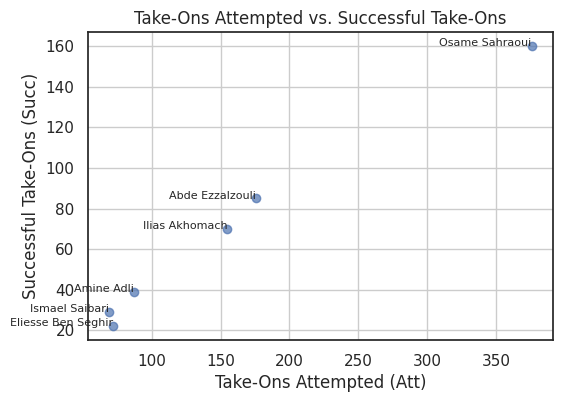

In [ ]:
import matplotlib.pyplot as plt

# Plot Att vs. Succ
plt.figure(figsize=(6, 4))
plt.scatter(df_possession_stats_fixed['Att'], df_possession_stats_fixed['Succ'], alpha=0.7)
plt.title('Take-Ons Attempted vs. Successful Take-Ons')
plt.xlabel('Take-Ons Attempted (Att)')
plt.ylabel('Successful Take-Ons (Succ)')
for i, player in df_possession_stats_fixed.iterrows():
    plt.annotate(player['Player'], (player['Att'], player['Succ']), fontsize=8, ha='right')
plt.grid(True)
plt.show()


###4. Att vs. Att Pen
This chart plots the number of take-ons attempted (Att) against the number of take-ons in the penalty area (Att Pen). Each point represents a player, showing their overall take-on attempts and how many occurred in the penalty area.



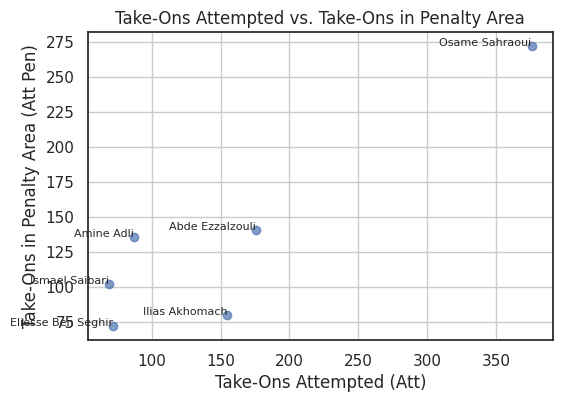

In [ ]:
import matplotlib.pyplot as plt

# Plot Att vs. Att Pen
plt.figure(figsize=(6, 4))
plt.scatter(df_possession_stats_fixed['Att'], df_possession_stats_fixed['Att Pen'], alpha=0.7)
plt.title('Take-Ons Attempted vs. Take-Ons in Penalty Area')
plt.xlabel('Take-Ons Attempted (Att)')
plt.ylabel('Take-Ons in Penalty Area (Att Pen)')
for i, player in df_possession_stats_fixed.iterrows():
    plt.annotate(player['Player'], (player['Att'], player['Att Pen']), fontsize=8, ha='right')
plt.grid(True)
plt.show()


###5. Mis vs. Dis
This chart plots the number of miscontrols (Mis) against the number of times dispossessed (Dis). Each point represents a player, showing how their miscontrols relate to the times they were dispossessed.



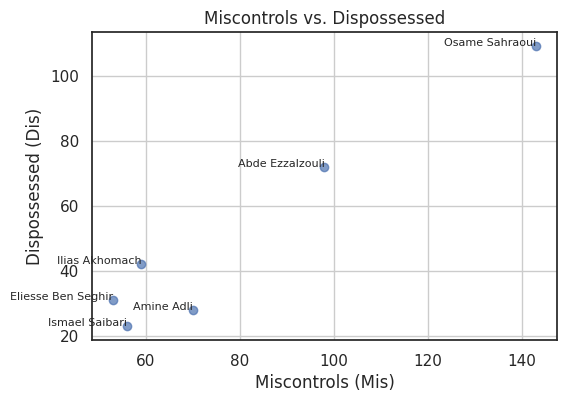

In [ ]:
import matplotlib.pyplot as plt

# Plot Mis vs. Dis
plt.figure(figsize=(6, 4))
plt.scatter(df_possession_stats_fixed['Mis'], df_possession_stats_fixed['Dis'], alpha=0.7)
plt.title('Miscontrols vs. Dispossessed')
plt.xlabel('Miscontrols (Mis)')
plt.ylabel('Dispossessed (Dis)')
for i, player in df_possession_stats_fixed.iterrows():
    plt.annotate(player['Player'], (player['Mis'], player['Dis']), fontsize=8, ha='right')
plt.grid(True)
plt.show()


### 4. Heatmap: Correlation of different stats in shooting


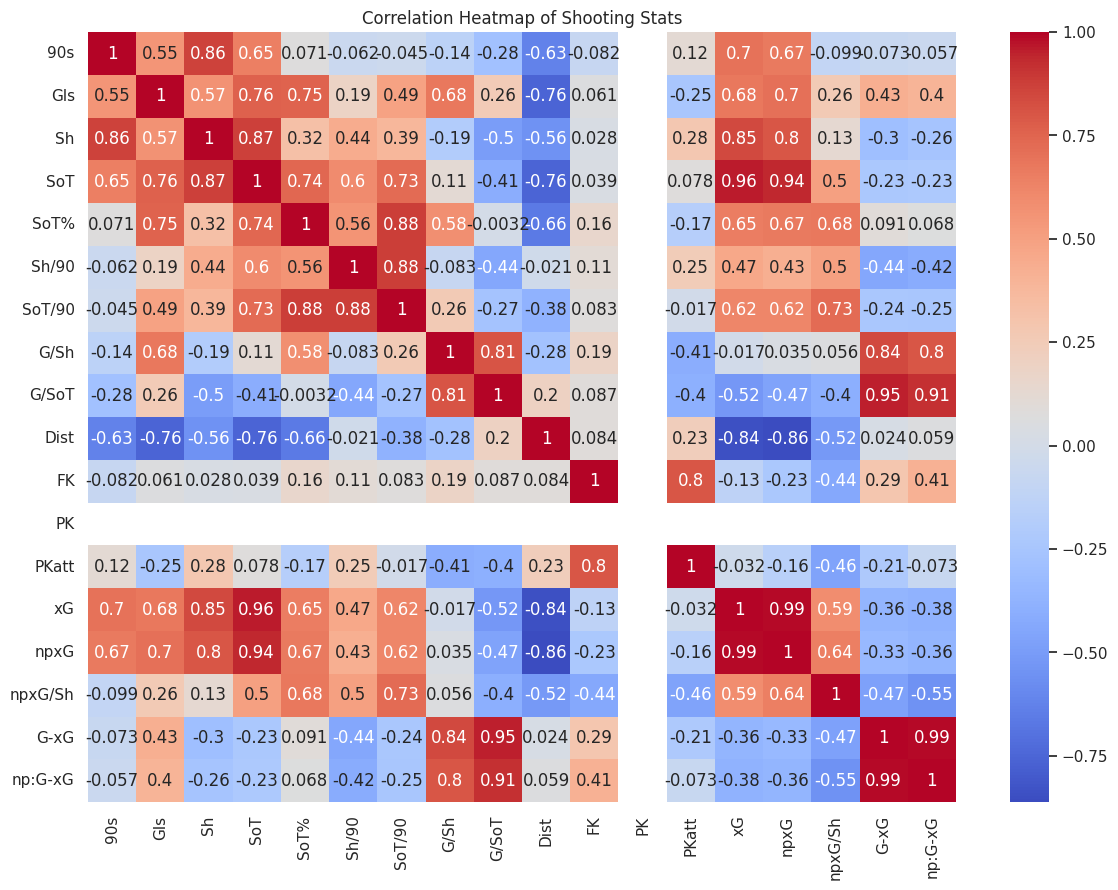

In [ ]:
numeric_columns = df_shooting_fixed.select_dtypes(include='number')

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Shooting Stats')
plt.show()

###. Radar Chart: Compare player strengths

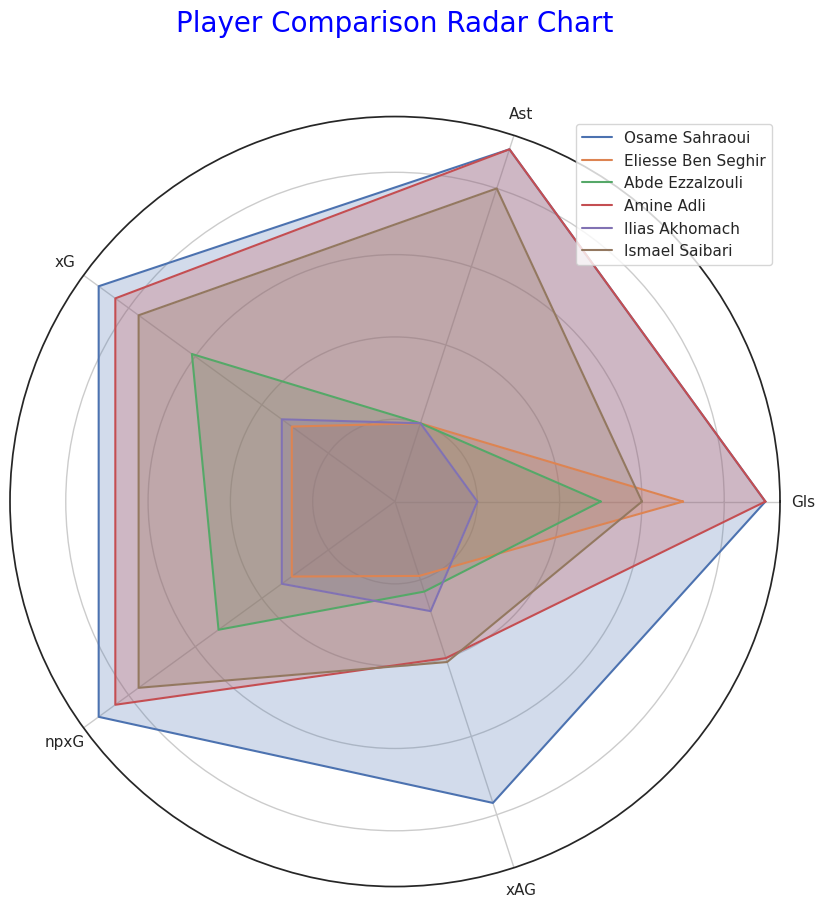

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def radar_chart(df, variables, title):
    labels = variables
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for i, row in df.iterrows():
        values = row[variables].tolist()
        values += values[:1]
        ax.plot(angles, values, label=row['Player'])
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title(title, size=20, color='blue', y=1.1)
    plt.legend(loc='upper right')
    plt.show()

variables = ['Gls', 'Ast', 'xG', 'npxG', 'xAG']
radar_chart(df_data, variables, 'Player Comparison Radar Chart')


###2. Scatter Plot
A scatter plot can show the relationship between two statistics for all players.

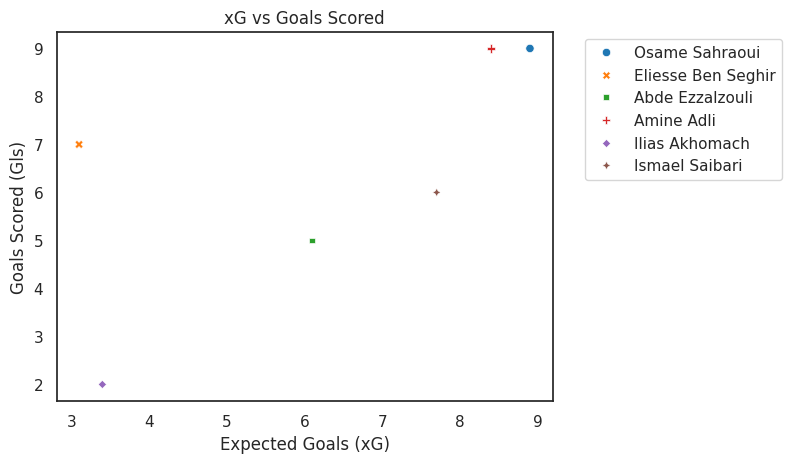

In [ ]:
import seaborn as sns

sns.scatterplot(data=df_data, x='xG', y='Gls', hue='Player', style='Player', palette='tab10')
plt.title('xG vs Goals Scored')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals Scored (Gls)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###3. Bar Chart
A bar chart can compare a specific statistic for all players.

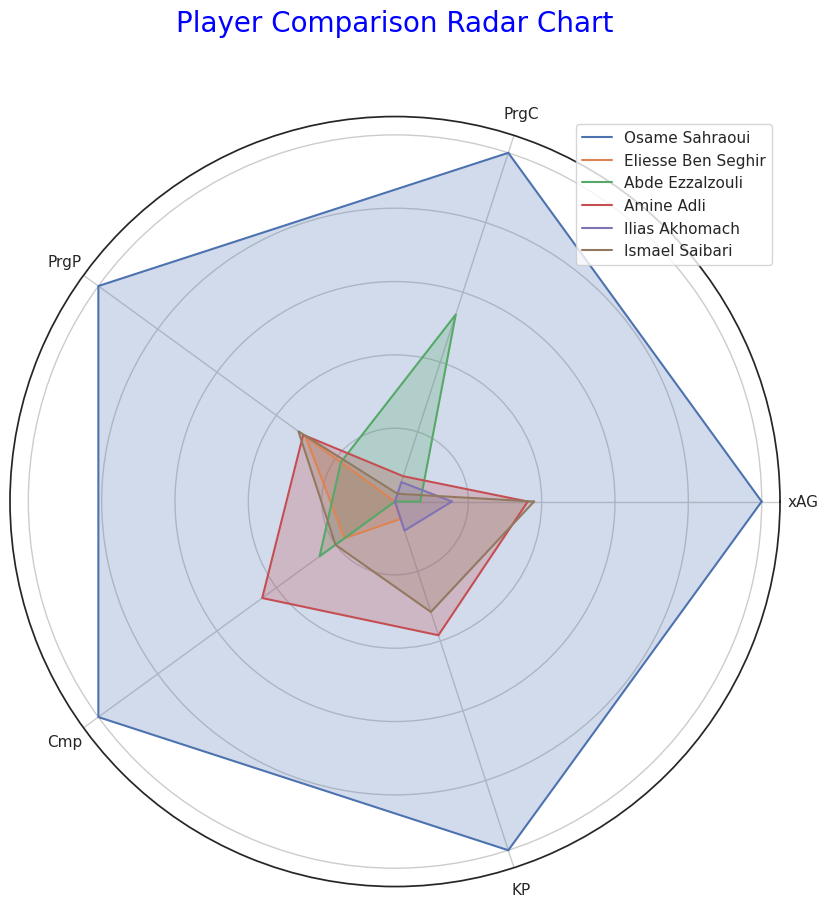

In [ ]:
def normalize(df, columns):
    df_norm = df.copy()
    for col in columns:
        df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df_norm

# Select relevant columns
columns = ['Player', 'xAG', 'PrgC', 'PrgP', 'Cmp', 'A-xAG', 'KP']
df_radar = df_data[columns]

# Normalize the data
df_radar_norm = normalize(df_radar, ['xAG', 'PrgC', 'PrgP', 'Cmp', 'A-xAG', 'KP'])

def radar_chart(df, variables, title):
    labels = variables
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for i, row in df.iterrows():
        values = row[variables].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=row['Player'])
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title(title, size=20, color='blue', y=1.1)
    plt.legend(loc='upper right')
    plt.show()

# List of variables to display on radar chart
variables = ['xAG', 'PrgC', 'PrgP', 'Cmp', 'KP']
radar_chart(df_radar_norm, variables, 'Player Comparison Radar Chart')



###3. Scatter Plot: TklW vs. TO


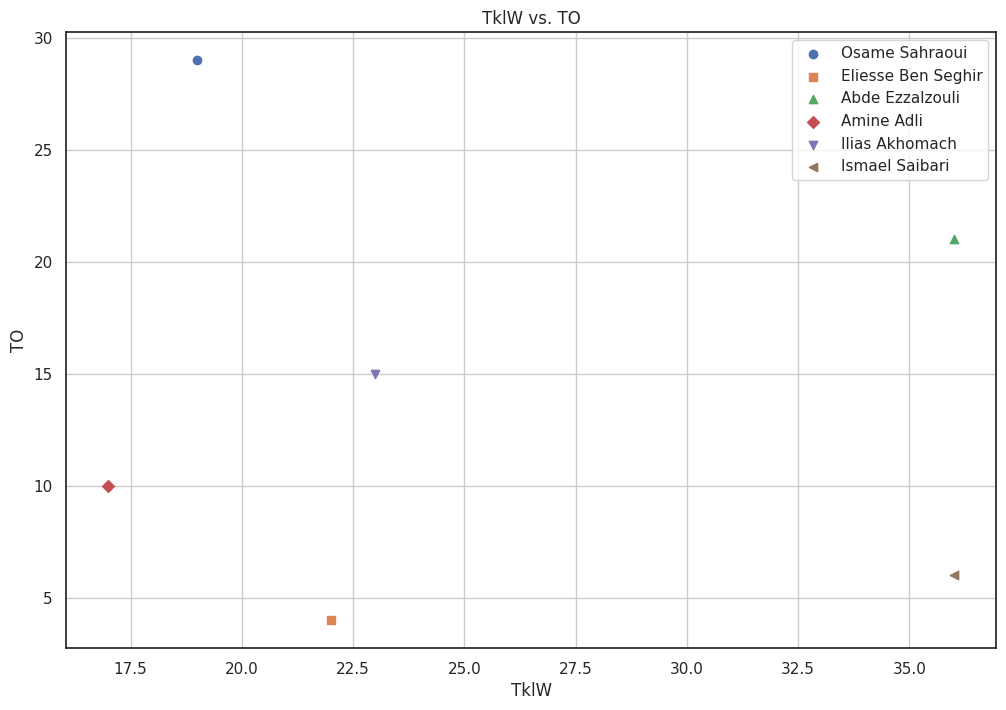

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a list of markers for the scatter plot
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', '+', 'x', 'H', 'h', '|', '_']

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot each player's data with a unique marker
for i, row in df_data.iterrows():
    plt.scatter(row['TklW'], row['TO'],
                marker=markers[i % len(markers)],  # Assign marker type
                label=row['Player'])  # Add player name to legend

plt.title('TklW vs. TO')
plt.xlabel('TklW')
plt.ylabel('TO')
plt.legend(loc='best')  # Show legend
plt.grid(True)
plt.show()


###2. Radar Chart for SCA


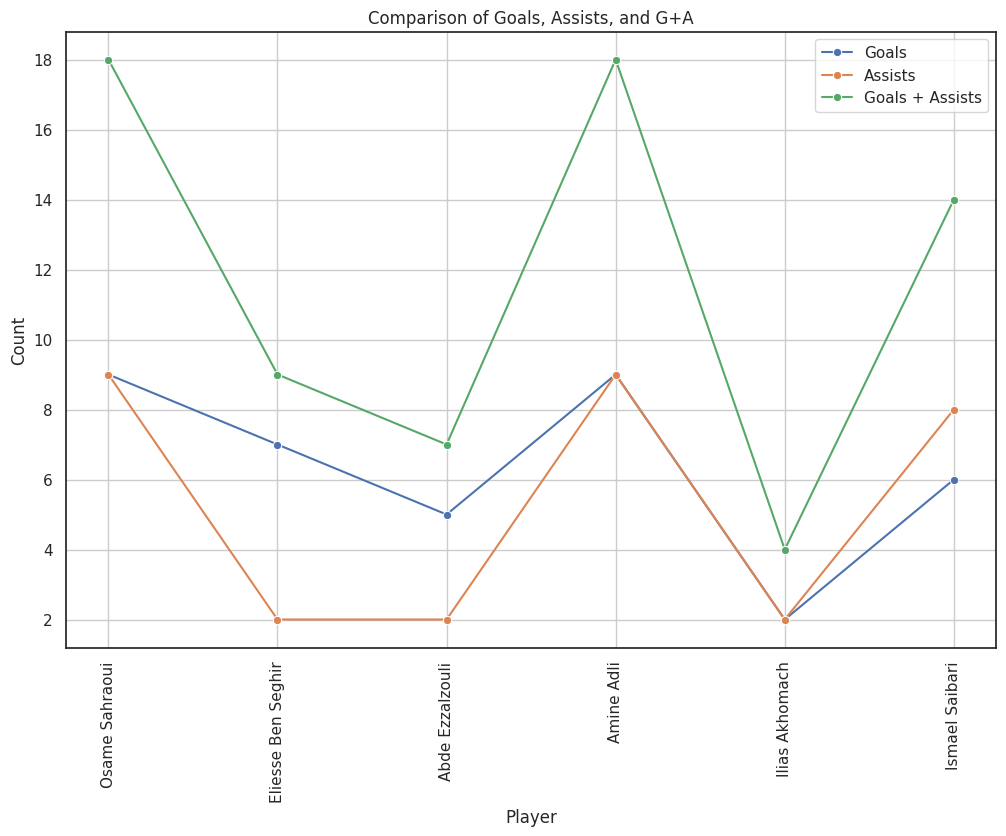

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_data, x='Player', y='Gls', marker='o', label='Goals')
sns.lineplot(data=df_data, x='Player', y='Ast', marker='o', label='Assists')
sns.lineplot(data=df_data, x='Player', y='G+A', marker='o', label='Goals + Assists')
plt.xticks(rotation=90)
plt.title('Comparison of Goals, Assists, and G+A')
plt.xlabel('Player')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
